# Assessing first connection and visualizations

In [1]:
from src.analysis import Visualizer
from src.database import DatabaseManager
from src.analysis import AnalysisPreparation
import os
from pathlib import Path
import statsmodels 

In [2]:
# download data from database
# Get path to project root (one level up from notebooks directory)
project_root = str(Path().absolute().parent)
print(project_root)
database_path = os.path.join(project_root, 'data')
print (database_path)
db = DatabaseManager(database_file = "overwatch_data.db", base_path=database_path)
db.setup_connection()
player_data = db.query('SELECT * FROM players')
match_data = db.query('SELECT * FROM matches')
player_data = player_data.drop_duplicates(player_data.loc[:, player_data.columns != 'id'])


C:\Users\olexs\Documents\OWCS_Analysis
C:\Users\olexs\Documents\OWCS_Analysis\data


In [3]:
# prepare for visualization
preparation = AnalysisPreparation(player_data, match_data)
preparation.add_duration()
preparation.validate_durations()
preparation.adjust_points()
preparation.calculate_round_duration()
preparation.calculate_derived()
preparation.calculate_value()
new_player_data = preparation.player_data

C:\Users\olexs\Documents\OWCS_Analysis\src\analysis\analysis_preparation.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.match_data[column] = self.match_data[column].apply(ast.literal_eval)
C:\Users\olexs\Documents\OWCS_Analysis\src\analysis\analysis_preparation.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.match_data['duration'] = ((self.match_data['finished_at'] - self.match_data['started_at']) * 0.9)


<Figure size 640x480 with 0 Axes>

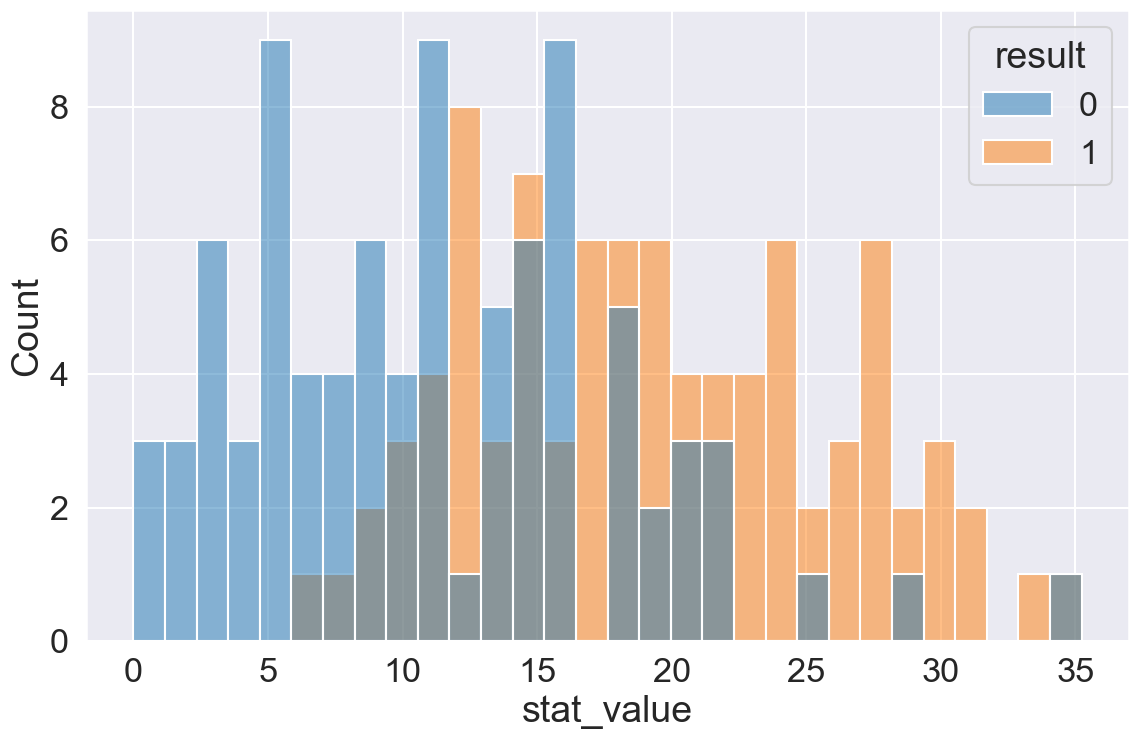

In [8]:
visualizer = Visualizer(new_player_data)
visualizer.filter_by(role = "Support", stat_type = "eliminations_per_10")
visualizer.simple_histogram(x_col = "stat_value", n_bins= 30)

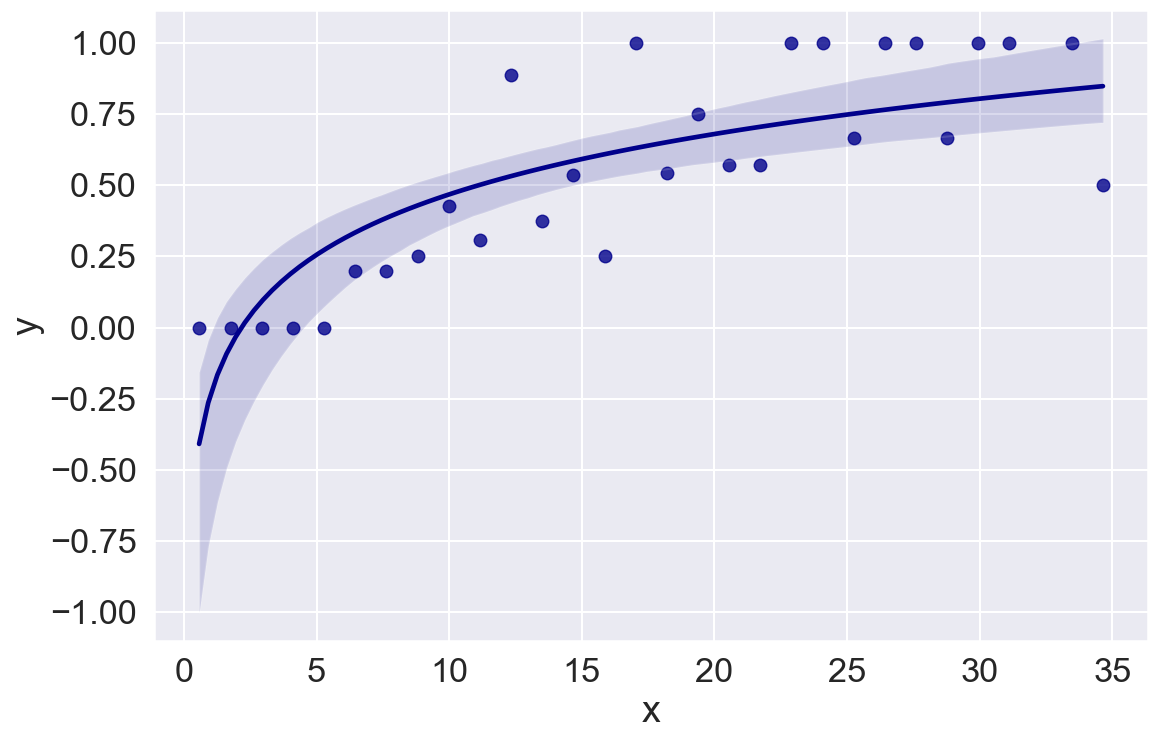

In [9]:
visualizer.winrate(x_col = "stat_value", n_bins = 30, lowess=False, logx=True)